### Постановка задачи:
За годы работы международная финансовая компания собрала основные банковские данные и большой объем информации, связанный с кредитной историей. Руководство хочет создать интеллектуальную систему для разделения сотдруников по кредитным группам, чтобы сократить ручной труд.

### Задача:
На основе кредтиной истории человека построить модель машинного обучения, которая сможет классифицировать кредитный рейтинг человека

In [53]:
!pip install kagglehub


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [54]:
import kagglehub
import pandas
import matplotlib.pyplot as plt
import numpy as np

In [55]:
def convert_income_values(value):
    value_str = str(value).strip()

    try:
        return float(value_str)
    except ValueError:
        try:
            cleaned = value_str.replace('_', '').replace(' ', '')
            return float(cleaned)
        except:
            return np.nan

In [56]:
path = kagglehub.dataset_download("parisrohan/credit-score-classification")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\MypkaXD\.cache\kagglehub\datasets\parisrohan\credit-score-classification\versions\1


In [57]:
df = pandas.read_csv(f'{path}\\train.csv')

C:\Users\MypkaXD\AppData\Local\Temp\ipykernel_30288\432244588.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pandas.read_csv(f'{path}\\train.csv')


In [58]:
df

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979,Standard


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [60]:
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [61]:
display(df.describe())

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


In [62]:
print(df.shape)

(100000, 28)


In [63]:
for i in range(0, len(df.columns)):
    print(f'count of NaN in {df.columns[i]} = {df[df.columns[i]].isna().sum()}')

count of NaN in ID = 0
count of NaN in Customer_ID = 0
count of NaN in Month = 0
count of NaN in Name = 9985
count of NaN in Age = 0
count of NaN in SSN = 0
count of NaN in Occupation = 0
count of NaN in Annual_Income = 0
count of NaN in Monthly_Inhand_Salary = 15002
count of NaN in Num_Bank_Accounts = 0
count of NaN in Num_Credit_Card = 0
count of NaN in Interest_Rate = 0
count of NaN in Num_of_Loan = 0
count of NaN in Type_of_Loan = 11408
count of NaN in Delay_from_due_date = 0
count of NaN in Num_of_Delayed_Payment = 7002
count of NaN in Changed_Credit_Limit = 0
count of NaN in Num_Credit_Inquiries = 1965
count of NaN in Credit_Mix = 0
count of NaN in Outstanding_Debt = 0
count of NaN in Credit_Utilization_Ratio = 0
count of NaN in Credit_History_Age = 9030
count of NaN in Payment_of_Min_Amount = 0
count of NaN in Total_EMI_per_month = 0
count of NaN in Amount_invested_monthly = 4479
count of NaN in Payment_Behaviour = 0
count of NaN in Monthly_Balance = 1200
count of NaN in Credit_

In [64]:
print(df.head(10))

       ID Customer_ID     Month             Name   Age          SSN  \
0  0x1602   CUS_0xd40   January    Aaron Maashoh    23  821-00-0265   
1  0x1603   CUS_0xd40  February    Aaron Maashoh    23  821-00-0265   
2  0x1604   CUS_0xd40     March    Aaron Maashoh  -500  821-00-0265   
3  0x1605   CUS_0xd40     April    Aaron Maashoh    23  821-00-0265   
4  0x1606   CUS_0xd40       May    Aaron Maashoh    23  821-00-0265   
5  0x1607   CUS_0xd40      June    Aaron Maashoh    23  821-00-0265   
6  0x1608   CUS_0xd40      July    Aaron Maashoh    23  821-00-0265   
7  0x1609   CUS_0xd40    August              NaN    23    #F%$D@*&8   
8  0x160e  CUS_0x21b1   January  Rick Rothackerj   28_  004-07-5839   
9  0x160f  CUS_0x21b1  February  Rick Rothackerj    28  004-07-5839   

  Occupation Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  \
0  Scientist      19114.12            1824.843333                  3  ...   
1  Scientist      19114.12                    NaN               

ID - уникальный идентификатор записи
Customer_ID - уникальная идентификация человека
Month - месяц года
Name - имя
Age - возраст
SSN - номер социального страхования
Occupation - род занятия человека
Annual_Income - годовой доход человека
Monthly_Inhand_Salary - ежемесячная базовая заработная плата человека
Num_Bank_Accounts - представляет собой количество банковских счетов, которые имеет человек
Num_Credit_Card - представляет собой количество других кредитных карт, имеющихся у человека
Interest_Rate - представляет собой процентную ставку по кредитной карте
Num_of_Loan - представляет собой количество кредитов, взятых в банке
Type_of_Loan - представляет собой типы кредитов, взятых лицом
Delay_from_due_date - представляет собой среднее количество дней задержки с даты платежа
Num_of_Delayed_Payment - представляет собой среднее количество платежей, просроченных человеком
Changed_Credit_Limit - представляет собой процентное изменение лимита кредитной карты
Num_Credit_Inquiries - представляет количество запросов по кредитным картам
Credit_Mix - представляет собой классификацию набора кредитов
Outstanding_Debt - представляет собой оставшуюся задолженность, подлежащую уплате (в долларах США)
Credit_Utilization_Ratio - представляет собой коэффициент использования кредитной карты
Credit_History_Age - представляет собой возраст кредитной истории человека
Payment_of_Min_Amount - показывает, была ли оплачена лицом только минимальная сумма
Total_EMI_per_month - представляет собой ежемесячные платежи по EMI (в долларах США)
Amount_invested_monthly - представляет собой ежемесячную сумму инвестиций клиента (в долларах США)
Payment_Behaviour - представляет платежное поведение клиента (в долларах США)
Monthly_Balance - представляет собой ежемесячный остаток на счете клиента (в долларах США)
Credit_Score - представляет собой диапазон кредитного рейтинга (плохой, стандартный, хороший)

In [65]:
print(df.dtypes) # очень много типов данных object

ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                          object
SSN                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                

Рассмотрим Age, мне инетересно узнать возраст людей, которые берут кредит

In [66]:
print(df.Age.unique())
print(df.Age.dtype)
print(len(df.Age.value_counts()))
print(df.Age.value_counts())
print(df.Age.isna().sum())

['23' '-500' '28_' ... '4808_' '2263' '1342']
object
1788
Age
38      2833
28      2829
31      2806
26      2792
32      2749
        ... 
6618       1
3155       1
5063       1
2875       1
4347       1
Name: count, Length: 1788, dtype: int64
0


Видно, что различных значений для Age слишком много (целых 1788), это значит, что есть большое кол-во опечаток, неверных значений или ошибок, так как должно их быть примерно 100.

In [67]:
# counter_age_isnt_digit = 0
# for i in range(0, len(df.Age)):
#     if df.Age[i].isdigit() == False:
#         counter_age_isnt_digit+=1
# print(counter_age_isnt_digit)

print((~df.Age.astype(str).str.isdigit()).sum()) # число значений, которые нельзя представить в виде числа


5825


In [68]:
age_converted = np.array([convert_income_values(age) for age in df.Age])

In [69]:
print(age_converted)
print(np.median(age_converted))
print(np.quantile(age_converted, 0.25))
print(np.quantile(age_converted, 0.75))
print(np.min(age_converted[(age_converted > 0) & (age_converted < 200)]))

# в некоторых случаях кредит можно брать с 14 лет, поэтому скорее всего это не ошибка
print(len(age_converted[(age_converted > 0) & (age_converted < 14)]))
print(len(age_converted[(age_converted > 0) & (age_converted < 18)])) 

[  23.   23. -500. ...   25.   25.   25.]
33.0
24.0
42.0
14.0
0
5706


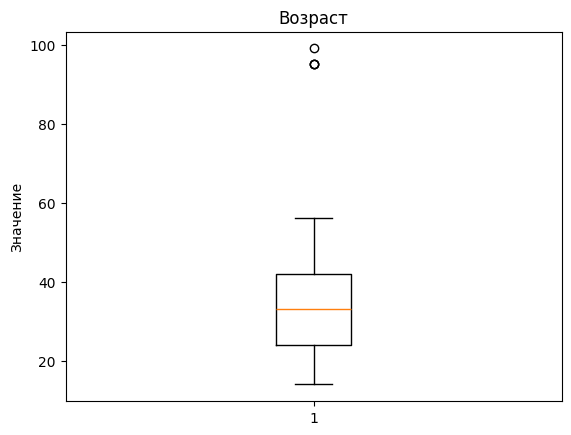

In [70]:
# https://habr.com/ru/articles/879840/ про BoxPlot + там есть картинки с обозначениями
plt.boxplot(age_converted[(age_converted > 0) & (age_converted < 100)])
plt.ylabel('Значение')
plt.title('Возраст')
plt.show()

# круги - выбросы (аномальные значения, также они присутсвуют и для больше 200, но я их не стал визуализировать)
# все что между усов, данные, которые я буду считать корректными


In [71]:
df_converted = pandas.DataFrame({'age': age_converted})
print(df_converted['age'])

print(df['Age'])

0         23.0
1         23.0
2       -500.0
3         23.0
4         23.0
         ...  
99995     25.0
99996     25.0
99997     25.0
99998     25.0
99999     25.0
Name: age, Length: 100000, dtype: float64
0          23
1          23
2        -500
3          23
4          23
         ... 
99995      25
99996      25
99997      25
99998      25
99999      25
Name: Age, Length: 100000, dtype: object


Рассмотрим Month - месяц

In [72]:
print(df.Month.isna().sum())
print(len(df.Month))
print(df.Month.unique())
print(df.Month.value_counts())
print(df.Month.dtype)

0
100000
['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August']
Month
January     12500
February    12500
March       12500
April       12500
May         12500
June        12500
July        12500
August      12500
Name: count, dtype: int64
object


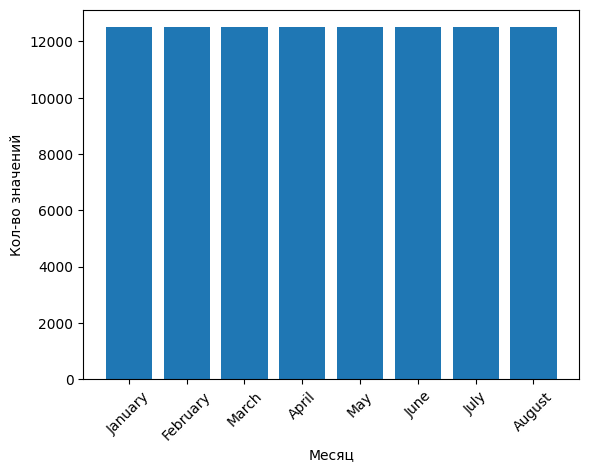

In [73]:
plt.bar(df.Month.unique(), df.Month.value_counts())
plt.xticks(rotation=45)
plt.xlabel('Месяц')
plt.ylabel('Кол-во значений')
plt.show()

Месяц необходимо преобразовать в значение

In [74]:
month_map = {'January' : 1, 'February' : 2, 'March' : 3, 'April' : 4, 'May' : 5, 'June' : 6, 'July' : 7, 'August' : 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12}

month_converted = np.array([month_map.get(current_month) for current_month in df.Month])
print(month_converted)
print('-----------------------')
df_converted['month'] = month_converted
print(df_converted)
print('-----------------------')
print(df_converted['month'])
print('-----------------------')
print(df.Month.tail())
print('-----------------------')
print(df.Month.head())

[1 2 3 ... 6 7 8]
-----------------------
         age  month
0       23.0      1
1       23.0      2
2     -500.0      3
3       23.0      4
4       23.0      5
...      ...    ...
99995   25.0      4
99996   25.0      5
99997   25.0      6
99998   25.0      7
99999   25.0      8

[100000 rows x 2 columns]
-----------------------
0        1
1        2
2        3
3        4
4        5
        ..
99995    4
99996    5
99997    6
99998    7
99999    8
Name: month, Length: 100000, dtype: int64
-----------------------
99995     April
99996       May
99997      June
99998      July
99999    August
Name: Month, dtype: object
-----------------------
0     January
1    February
2       March
3       April
4         May
Name: Month, dtype: object


In [75]:
print(df.Annual_Income.isna().sum())
print(df.Annual_Income.unique())
print(df.Annual_Income.head())
print(df.Annual_Income.tail())

0
['19114.12' '34847.84' '34847.84_' ... '20002.88' '39628.99' '39628.99_']
0    19114.12
1    19114.12
2    19114.12
3    19114.12
4    19114.12
Name: Annual_Income, dtype: object
99995     39628.99
99996     39628.99
99997     39628.99
99998     39628.99
99999    39628.99_
Name: Annual_Income, dtype: object


In [76]:
annual_income_converted = np.array([convert_income_values(value) for value in df.Annual_Income])
print(annual_income_converted)

[19114.12 19114.12 19114.12 ... 39628.99 39628.99 39628.99]


In [77]:
df_converted['annual_income'] = annual_income_converted
print(df_converted['annual_income'].isna().sum())
display(df_converted['annual_income'].describe())
print(df_converted['annual_income'].head())
print(df_converted['annual_income'].tail())
print(len(df_converted['annual_income'].unique()))
print(df_converted['annual_income'].value_counts())

0


count    1.000000e+05
mean     1.764157e+05
std      1.429618e+06
min      7.005930e+03
25%      1.945750e+04
50%      3.757861e+04
75%      7.279092e+04
max      2.419806e+07
Name: annual_income, dtype: float64

0    19114.12
1    19114.12
2    19114.12
3    19114.12
4    19114.12
Name: annual_income, dtype: float64
99995    39628.99
99996    39628.99
99997    39628.99
99998    39628.99
99999    39628.99
Name: annual_income, dtype: float64
13487
annual_income
17273.83       16
17816.75       16
40341.16       16
9141.63        16
109945.32      16
               ..
6515990.00      1
10152115.00     1
586359.00       1
10909427.00     1
436443.00       1
Name: count, Length: 13487, dtype: int64


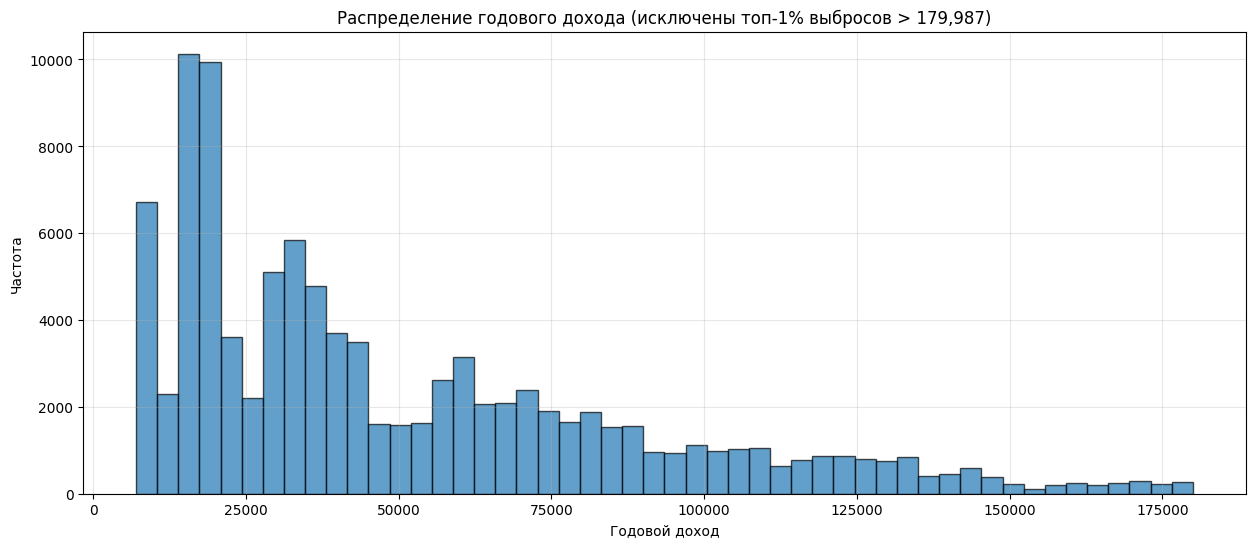

In [78]:
plt.figure(figsize=(15, 6))

Q99 = df_converted['annual_income'].quantile(0.99)
filtered_income = df_converted['annual_income'][df_converted['annual_income'] <= Q99]

plt.hist(filtered_income, bins=50, alpha=0.7, edgecolor='black')
plt.xlabel('Годовой доход')
plt.ylabel('Частота')
plt.title(f'Распределение годового дохода (исключены топ-1% выбросов > {Q99:,.0f})')
plt.grid(True, alpha=0.3)
plt.show()

Рассмотрим ежемесячную зарплату на руки

In [79]:
print(df.Monthly_Inhand_Salary.isna().sum())
print(df.Monthly_Inhand_Salary.dtype)

df_converted['monthly_inhand_salary'] = df.Monthly_Inhand_Salary
print(df_converted)

15002
float64
         age  month  annual_income  monthly_inhand_salary
0       23.0      1       19114.12            1824.843333
1       23.0      2       19114.12                    NaN
2     -500.0      3       19114.12                    NaN
3       23.0      4       19114.12                    NaN
4       23.0      5       19114.12            1824.843333
...      ...    ...            ...                    ...
99995   25.0      4       39628.99            3359.415833
99996   25.0      5       39628.99            3359.415833
99997   25.0      6       39628.99            3359.415833
99998   25.0      7       39628.99            3359.415833
99999   25.0      8       39628.99            3359.415833

[100000 rows x 4 columns]


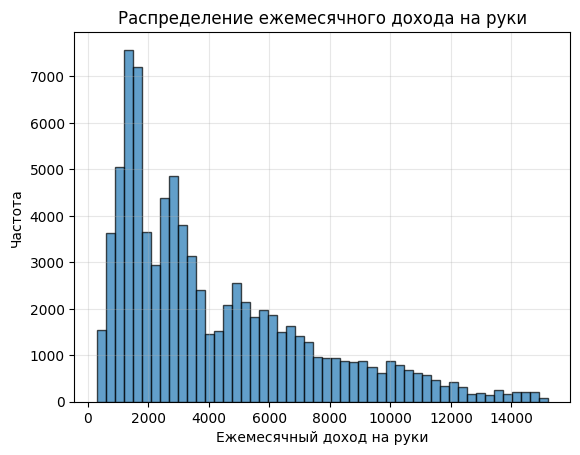

In [80]:
plt.hist(df.Monthly_Inhand_Salary, bins=50, alpha=0.7, edgecolor='black')
plt.title('Распределение ежемесячного дохода на руки')
plt.xlabel('Ежемесячный доход на руки')
plt.ylabel('Частота')
plt.grid(True, alpha=0.3)
plt.show()

Рассмотрим Num_Bank_Accounts

In [81]:
print(df.Num_Bank_Accounts.isna().sum())
print(df.Num_Bank_Accounts.unique())

0
[   3    2    1    7    4    0    8    5    6    9   10 1414 1231   67
  572 1488   91  528 1647 1696 1338  649  889 1668  685  857  975 1496
 1534 1620   37 1388 1429 1332 1588  120 1777 1096  803  494  744 1139
  831 1613  741  121  665 1748 1644  823 1356 1651   87  711  450  210
 1671 1722  648  672 1662 1495  510  666  429 1131 1434  980 1026  526
  718 1300 1312 1315  501 1566  480 1042  322  628 1016  333 1265  791
  427  563  905 1190 1036 1611   38  619  555 1769  280  752 1201  812
 1487  222  212 1019 1222  610 1714 1308  525 1158 1115 1616  754 1601
  797 1577  521  703  933  959  809 1089 1656 1113 1715  964 1533 1789
  871  434 1295  565 1724  603  677  541  698 1101  464 1539 1462 1011
 1257 1727   45  244 1266  897  535  484  331  675  826  946 1675  105
 1327  845  549  473  710  527  908   68 1628  371  445 1168  868  687
  455 1003   26 1526  618  598  351 1342 1783  683 1557 1335  416 1747
  137 1475  373  338  942  170  973 1605 1478  386 1448 1033 1225  596
 173

In [82]:
print(df.Num_Bank_Accounts.describe())

count    100000.000000
mean         17.091280
std         117.404834
min          -1.000000
25%           3.000000
50%           6.000000
75%           7.000000
max        1798.000000
Name: Num_Bank_Accounts, dtype: float64


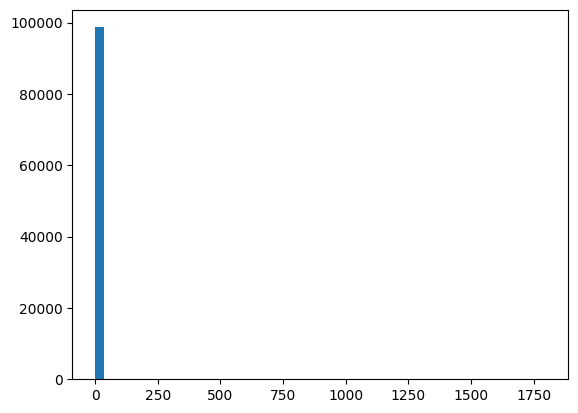

In [83]:
plt.hist(df.Num_Bank_Accounts, bins=50)
plt.show()

In [84]:
df_converted['num_bank_accounts'] = df.Num_Bank_Accounts
display(df_converted)

,age,month,annual_income,monthly_inhand_salary,num_bank_accounts
0,23.0,1,19114.12,1824.843333,3
1,23.0,2,19114.12,NaN,3
2,-500.0,3,19114.12,NaN,3
3,23.0,4,19114.12,NaN,3
4,23.0,5,19114.12,1824.843333,3
...,...,...,...,...,...
99995,25.0,4,39628.99,3359.415833,4
99996,25.0,5,39628.99,3359.415833,4
99997,25.0,6,39628.99,3359.415833,4
99998,25.0,7,39628.99,3359.415833,4


In [85]:
print(df.Interest_Rate.dtype)
print(df.Interest_Rate.isna().sum())
print(df.Interest_Rate.unique())
print(df.Interest_Rate.value_counts())
print((df.Interest_Rate[df.Interest_Rate > 100]).value_counts())

int64
0
[   3    6    8 ... 1347  387 5729]
Interest_Rate
8       5012
5       4979
6       4721
12      4540
10      4540
        ... 
3085       1
159        1
375        1
3177       1
3032       1
Name: count, Length: 1750, dtype: int64
Interest_Rate
498     4
3089    4
1944    4
4676    4
2173    3
       ..
2724    1
570     1
3471    1
2964    1
2772    1
Name: count, Length: 1697, dtype: int64


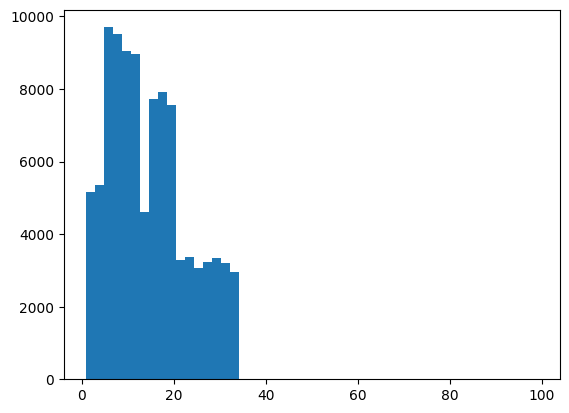

In [86]:
plt.hist(df.Interest_Rate[df.Interest_Rate < 100], bins=50)
plt.show()

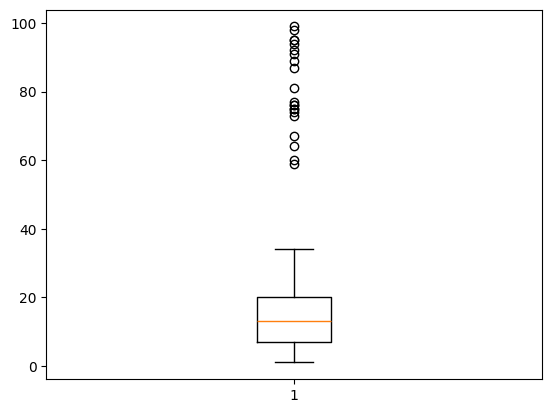

In [87]:
plt.boxplot(df.Interest_Rate[df.Interest_Rate < 100])
plt.show()

In [88]:
df_converted['interest_rate'] = df.Interest_Rate
display(df_converted)

,age,month,annual_income,monthly_inhand_salary,num_bank_accounts,interest_rate
0,23.0,1,19114.12,1824.843333,3,3
1,23.0,2,19114.12,NaN,3,3
2,-500.0,3,19114.12,NaN,3,3
3,23.0,4,19114.12,NaN,3,3
4,23.0,5,19114.12,1824.843333,3,3
...,...,...,...,...,...,...
99995,25.0,4,39628.99,3359.415833,4,7
99996,25.0,5,39628.99,3359.415833,4,7
99997,25.0,6,39628.99,3359.415833,4,5729
99998,25.0,7,39628.99,3359.415833,4,7


In [89]:
print(df.Num_Credit_Card.describe())

count    100000.00000
mean         22.47443
std         129.05741
min           0.00000
25%           4.00000
50%           5.00000
75%           7.00000
max        1499.00000
Name: Num_Credit_Card, dtype: float64


In [90]:
print(df.Num_Credit_Card.value_counts())

Num_Credit_Card
5       18459
7       16615
6       16559
4       14030
3       13277
        ...  
1405        1
708         1
62          1
343         1
481         1
Name: count, Length: 1179, dtype: int64


In [91]:
q75 = np.quantile(df.Num_Credit_Card, 0.75)
print(df.Num_Credit_Card[df.Num_Credit_Card > q75].value_counts().sort_index())
df_converted['num_credit_card'] = df.Num_Credit_Card

Num_Credit_Card
8       4956
9       4643
10      4860
11        36
15         3
        ... 
1495       1
1496       2
1497       3
1498       3
1499       2
Name: count, Length: 1171, dtype: int64


In [92]:
display(df_converted)

,age,month,annual_income,monthly_inhand_salary,num_bank_accounts,interest_rate,num_credit_card
0,23.0,1,19114.12,1824.843333,3,3,4
1,23.0,2,19114.12,NaN,3,3,4
2,-500.0,3,19114.12,NaN,3,3,4
3,23.0,4,19114.12,NaN,3,3,4
4,23.0,5,19114.12,1824.843333,3,3,4
...,...,...,...,...,...,...,...
99995,25.0,4,39628.99,3359.415833,4,7,6
99996,25.0,5,39628.99,3359.415833,4,7,6
99997,25.0,6,39628.99,3359.415833,4,5729,6
99998,25.0,7,39628.99,3359.415833,4,7,6


In [93]:
print(df.Num_of_Loan.dtype)
print(df.Num_of_Loan.unique())
print(df.Num_of_Loan.describe())

num_of_loan_converted = np.array([convert_income_values(value) for value in df.Num_of_Loan])

object
['4' '1' '3' '967' '-100' '0' '0_' '2' '3_' '2_' '7' '5' '5_' '6' '8' '8_'
 '9' '9_' '4_' '7_' '1_' '1464' '6_' '622' '352' '472' '1017' '945' '146'
 '563' '341' '444' '720' '1485' '49' '737' '1106' '466' '728' '313' '843'
 '597_' '617' '119' '663' '640' '92_' '1019' '501' '1302' '39' '716' '848'
 '931' '1214' '186' '424' '1001' '1110' '1152' '457' '1433' '1187' '52'
 '1480' '1047' '1035' '1347_' '33' '193' '699' '329' '1451' '484' '132'
 '649' '995' '545' '684' '1135' '1094' '1204' '654' '58' '348' '614'
 '1363' '323' '1406' '1348' '430' '153' '1461' '905' '1312' '1424' '1154'
 '95' '1353' '1228' '819' '1006' '795' '359' '1209' '590' '696' '1185_'
 '1465' '911' '1181' '70' '816' '1369' '143' '1416' '455' '55' '1096'
 '1474' '420' '1131' '904' '89' '1259' '527' '1241' '449' '983' '418'
 '319' '23' '238' '638' '138' '235_' '280' '1070' '1484' '274' '494'
 '1459_' '404' '1354' '1495' '1391' '601' '1313' '1319' '898' '231' '752'
 '174' '961' '1046' '834' '284' '438' '288' '1463' '1

In [94]:
print(num_of_loan_converted)

df_converted['num_of_loan'] = num_of_loan_converted

[4. 4. 4. ... 2. 2. 2.]


In [95]:
print(df_converted['num_of_loan'].isna().sum())
print(df_converted['num_of_loan'].unique())

0
[ 4.000e+00  1.000e+00  3.000e+00  9.670e+02 -1.000e+02  0.000e+00
  2.000e+00  7.000e+00  5.000e+00  6.000e+00  8.000e+00  9.000e+00
  1.464e+03  6.220e+02  3.520e+02  4.720e+02  1.017e+03  9.450e+02
  1.460e+02  5.630e+02  3.410e+02  4.440e+02  7.200e+02  1.485e+03
  4.900e+01  7.370e+02  1.106e+03  4.660e+02  7.280e+02  3.130e+02
  8.430e+02  5.970e+02  6.170e+02  1.190e+02  6.630e+02  6.400e+02
  9.200e+01  1.019e+03  5.010e+02  1.302e+03  3.900e+01  7.160e+02
  8.480e+02  9.310e+02  1.214e+03  1.860e+02  4.240e+02  1.001e+03
  1.110e+03  1.152e+03  4.570e+02  1.433e+03  1.187e+03  5.200e+01
  1.480e+03  1.047e+03  1.035e+03  1.347e+03  3.300e+01  1.930e+02
  6.990e+02  3.290e+02  1.451e+03  4.840e+02  1.320e+02  6.490e+02
  9.950e+02  5.450e+02  6.840e+02  1.135e+03  1.094e+03  1.204e+03
  6.540e+02  5.800e+01  3.480e+02  6.140e+02  1.363e+03  3.230e+02
  1.406e+03  1.348e+03  4.300e+02  1.530e+02  1.461e+03  9.050e+02
  1.312e+03  1.424e+03  1.154e+03  9.500e+01  1.353e+03  1.2

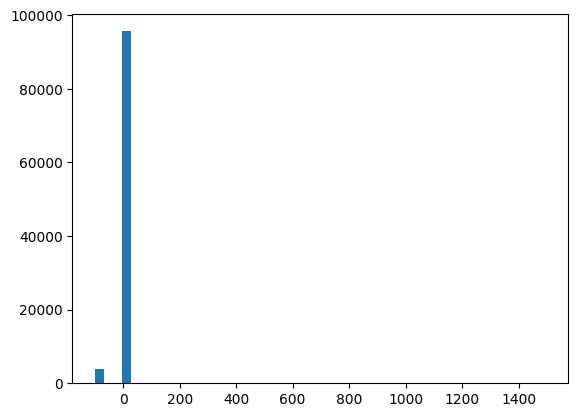

In [98]:
plt.hist(df_converted['num_of_loan'], bins=50)
plt.show()

3876


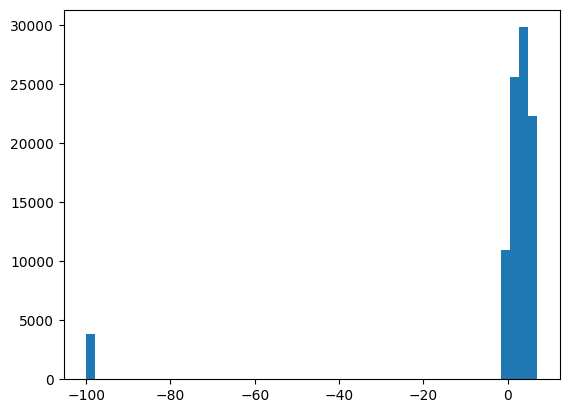

In [106]:
print(len(df_converted.num_of_loan[df_converted.num_of_loan < 0]))
plt.hist(df_converted.num_of_loan[df_converted.num_of_loan < np.quantile(df_converted.num_of_loan, 0.95)], bins=50)
plt.show()

In [149]:
print(len(df.Type_of_Loan.unique()))
print(df.Type_of_Loan.isna().sum())
print(df.Type_of_Loan.describe())

print(df.Type_of_Loan.value_counts().head(20))

6261
11408
count             88592
unique             6260
top       Not Specified
freq               1408
Name: Type_of_Loan, dtype: object
Type_of_Loan
Not Specified                               1408
Credit-Builder Loan                         1280
Personal Loan                               1272
Debt Consolidation Loan                     1264
Student Loan                                1240
Payday Loan                                 1200
Mortgage Loan                               1176
Auto Loan                                   1152
Home Equity Loan                            1136
Personal Loan, and Student Loan              320
Not Specified, and Payday Loan               272
Mortgage Loan, and Home Equity Loan          264
Student Loan, and Payday Loan                256
Credit-Builder Loan, and Not Specified       248
Student Loan, and Credit-Builder Loan        248
Payday Loan, and Debt Consolidation Loan     240
Payday Loan, and Auto Loan                   240
Credit-Builde

In [177]:
type_of_loan_converted = df.Type_of_Loan.apply(lambda x: x.lower().replace('and ', '').replace(', ', ',').split(',') if pandas.notna(x) else str(x))
print(type_of_loan_converted)

0        [auto loan, credit-builder loan, personal loan...
1        [auto loan, credit-builder loan, personal loan...
2        [auto loan, credit-builder loan, personal loan...
3        [auto loan, credit-builder loan, personal loan...
4        [auto loan, credit-builder loan, personal loan...
                               ...                        
99995                            [auto loan, student loan]
99996                            [auto loan, student loan]
99997                            [auto loan, student loan]
99998                            [auto loan, student loan]
99999                            [auto loan, student loan]
Name: Type_of_Loan, Length: 100000, dtype: object


In [178]:
df_converted['type_of_loan'] = type_of_loan_converted

In [179]:
display(df_converted)

,age,month,annual_income,monthly_inhand_salary,num_bank_accounts,interest_rate,num_credit_card,num_of_loan,type_of_loan
0,23.0,1,19114.12,1824.843333,3,3,4,4.0,"[auto loan, credit-builder loan, personal loan..."
1,23.0,2,19114.12,NaN,3,3,4,4.0,"[auto loan, credit-builder loan, personal loan..."
2,-500.0,3,19114.12,NaN,3,3,4,4.0,"[auto loan, credit-builder loan, personal loan..."
3,23.0,4,19114.12,NaN,3,3,4,4.0,"[auto loan, credit-builder loan, personal loan..."
4,23.0,5,19114.12,1824.843333,3,3,4,4.0,"[auto loan, credit-builder loan, personal loan..."
...,...,...,...,...,...,...,...,...,...
99995,25.0,4,39628.99,3359.415833,4,7,6,2.0,"[auto loan, student loan]"
99996,25.0,5,39628.99,3359.415833,4,7,6,2.0,"[auto loan, student loan]"
99997,25.0,6,39628.99,3359.415833,4,5729,6,2.0,"[auto loan, student loan]"
99998,25.0,7,39628.99,3359.415833,4,7,6,2.0,"[auto loan, student loan]"


In [182]:
print(df.Delay_from_due_date.isna().sum())
print(df.Delay_from_due_date.dtype)

0
int64


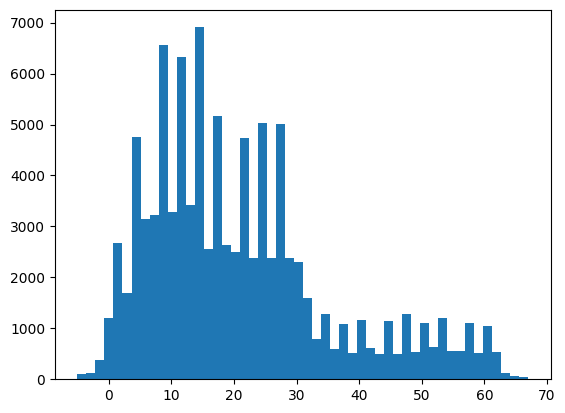

In [184]:
plt.hist(df.Delay_from_due_date, bins=50)
plt.show()

In [181]:
df_converted['delay_from_due_date'] = df.Delay_from_due_date
display(df_converted)

,age,month,annual_income,monthly_inhand_salary,num_bank_accounts,interest_rate,num_credit_card,num_of_loan,type_of_loan,delay_from_due_date
0,23.0,1,19114.12,1824.843333,3,3,4,4.0,"[auto loan, credit-builder loan, personal loan...",3
1,23.0,2,19114.12,NaN,3,3,4,4.0,"[auto loan, credit-builder loan, personal loan...",-1
2,-500.0,3,19114.12,NaN,3,3,4,4.0,"[auto loan, credit-builder loan, personal loan...",3
3,23.0,4,19114.12,NaN,3,3,4,4.0,"[auto loan, credit-builder loan, personal loan...",5
4,23.0,5,19114.12,1824.843333,3,3,4,4.0,"[auto loan, credit-builder loan, personal loan...",6
...,...,...,...,...,...,...,...,...,...,...
99995,25.0,4,39628.99,3359.415833,4,7,6,2.0,"[auto loan, student loan]",23
99996,25.0,5,39628.99,3359.415833,4,7,6,2.0,"[auto loan, student loan]",18
99997,25.0,6,39628.99,3359.415833,4,5729,6,2.0,"[auto loan, student loan]",27
99998,25.0,7,39628.99,3359.415833,4,7,6,2.0,"[auto loan, student loan]",20


In [186]:
print(df.Num_of_Delayed_Payment.isna().sum())
print(df.Num_of_Delayed_Payment.dtype)
print(df.Num_of_Delayed_Payment.unique())

7002
object
['7' nan '4' '8_' '6' '1' '-1' '3_' '0' '8' '5' '3' '9' '12' '15' '17'
 '10' '2' '2_' '11' '14' '20' '22' '13' '13_' '14_' '16' '12_' '18' '19'
 '23' '24' '21' '3318' '3083' '22_' '1338' '4_' '26' '11_' '3104' '21_'
 '25' '10_' '183_' '9_' '1106' '834' '19_' '24_' '17_' '23_' '2672' '20_'
 '2008' '-3' '538' '6_' '1_' '16_' '27' '-2' '3478' '2420' '15_' '707'
 '708' '26_' '18_' '3815' '28' '5_' '1867' '2250' '1463' '25_' '7_' '4126'
 '2882' '1941' '2655' '2628' '132' '3069' '306' '0_' '3539' '3684' '1823'
 '4128' '1946' '827' '2297' '2566' '904' '182' '929' '3568' '2503' '1552'
 '2812' '1697' '3764' '851' '3905' '923' '88' '1668' '3253' '808' '2689'
 '3858' '642' '3457' '1402' '1732' '3154' '847' '3037' '2204' '3103'
 '1063' '2056' '1282' '1841' '2569_' '211' '793' '3484' '411' '3491'
 '2072' '3050' '1049' '2162' '3402' '2753' '27_' '1718' '1014' '3260'
 '3855' '84' '2311' '3251' '1832' '4069' '3010' '733' '4241' '166' '2461'
 '1749' '3200' '663_' '2185' '4161' '3009' '359' 

In [187]:
num_of_delayed_payment = np.array([convert_income_values(value) for value in df.Num_of_Delayed_Payment])

In [188]:
print(num_of_delayed_payment)

[ 7. nan  7. ...  6. nan  6.]


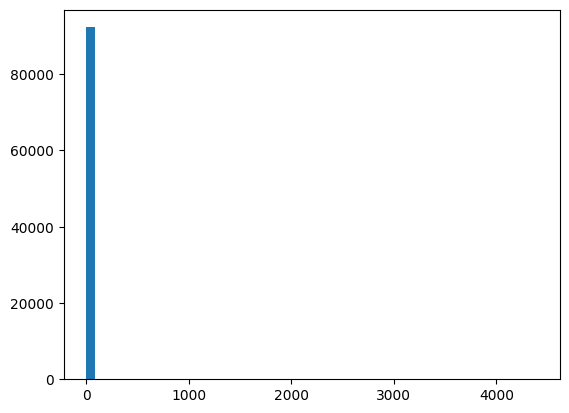

In [192]:
plt.hist(num_of_delayed_payment, bins=50)
plt.show()

In [193]:
df_converted['num_of_delayed_payments'] = num_of_delayed_payment

In [194]:
display(df_converted)

,age,month,annual_income,monthly_inhand_salary,num_bank_accounts,interest_rate,num_credit_card,num_of_loan,type_of_loan,delay_from_due_date,num_of_delayed_payments
0,23.0,1,19114.12,1824.843333,3,3,4,4.0,"[auto loan, credit-builder loan, personal loan...",3,7.0
1,23.0,2,19114.12,NaN,3,3,4,4.0,"[auto loan, credit-builder loan, personal loan...",-1,NaN
2,-500.0,3,19114.12,NaN,3,3,4,4.0,"[auto loan, credit-builder loan, personal loan...",3,7.0
3,23.0,4,19114.12,NaN,3,3,4,4.0,"[auto loan, credit-builder loan, personal loan...",5,4.0
4,23.0,5,19114.12,1824.843333,3,3,4,4.0,"[auto loan, credit-builder loan, personal loan...",6,NaN
...,...,...,...,...,...,...,...,...,...,...,...
99995,25.0,4,39628.99,3359.415833,4,7,6,2.0,"[auto loan, student loan]",23,7.0
99996,25.0,5,39628.99,3359.415833,4,7,6,2.0,"[auto loan, student loan]",18,7.0
99997,25.0,6,39628.99,3359.415833,4,5729,6,2.0,"[auto loan, student loan]",27,6.0
99998,25.0,7,39628.99,3359.415833,4,7,6,2.0,"[auto loan, student loan]",20,NaN


In [196]:
print(df.Changed_Credit_Limit.dtype)
print(df.Changed_Credit_Limit.isna().sum())
print(df.Changed_Credit_Limit)

object
0
0        11.27
1        11.27
2            _
3         6.27
4        11.27
         ...  
99995     11.5
99996     11.5
99997     11.5
99998     11.5
99999     11.5
Name: Changed_Credit_Limit, Length: 100000, dtype: object


In [197]:
changed_credit_limit_converted = np.array([convert_income_values(value) for value in df.Changed_Credit_Limit])
print(changed_credit_limit_converted)

[11.27 11.27   nan ... 11.5  11.5  11.5 ]


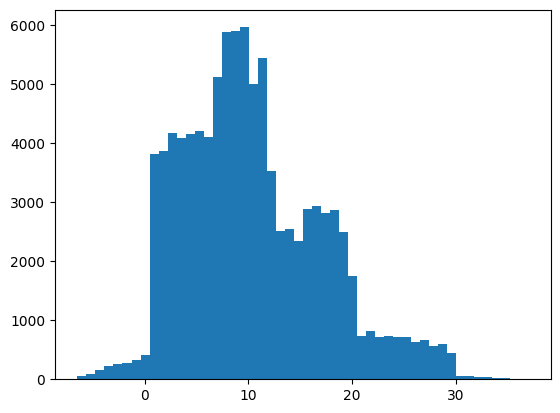

In [198]:
plt.hist(changed_credit_limit_converted, bins=50)
plt.show()

In [199]:
df_converted['changed_credit_limit'] = changed_credit_limit_converted

In [200]:
display(df_converted)

,age,month,annual_income,monthly_inhand_salary,num_bank_accounts,interest_rate,num_credit_card,num_of_loan,type_of_loan,delay_from_due_date,num_of_delayed_payments,changed_credit_limit
0,23.0,1,19114.12,1824.843333,3,3,4,4.0,"[auto loan, credit-builder loan, personal loan...",3,7.0,11.27
1,23.0,2,19114.12,NaN,3,3,4,4.0,"[auto loan, credit-builder loan, personal loan...",-1,NaN,11.27
2,-500.0,3,19114.12,NaN,3,3,4,4.0,"[auto loan, credit-builder loan, personal loan...",3,7.0,NaN
3,23.0,4,19114.12,NaN,3,3,4,4.0,"[auto loan, credit-builder loan, personal loan...",5,4.0,6.27
4,23.0,5,19114.12,1824.843333,3,3,4,4.0,"[auto loan, credit-builder loan, personal loan...",6,NaN,11.27
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,25.0,4,39628.99,3359.415833,4,7,6,2.0,"[auto loan, student loan]",23,7.0,11.50
99996,25.0,5,39628.99,3359.415833,4,7,6,2.0,"[auto loan, student loan]",18,7.0,11.50
99997,25.0,6,39628.99,3359.415833,4,5729,6,2.0,"[auto loan, student loan]",27,6.0,11.50
99998,25.0,7,39628.99,3359.415833,4,7,6,2.0,"[auto loan, student loan]",20,NaN,11.50


In [202]:
print(df.Num_Credit_Inquiries.dtype)
print(df.Num_Credit_Inquiries.isna().sum())

float64
1965


In [203]:
df_converted['num_credit_inquities'] = df.Num_Credit_Inquiries
display(df_converted)

,age,month,annual_income,monthly_inhand_salary,num_bank_accounts,interest_rate,num_credit_card,num_of_loan,type_of_loan,delay_from_due_date,num_of_delayed_payments,changed_credit_limit,num_credit_inquities
0,23.0,1,19114.12,1824.843333,3,3,4,4.0,"[auto loan, credit-builder loan, personal loan...",3,7.0,11.27,4.0
1,23.0,2,19114.12,NaN,3,3,4,4.0,"[auto loan, credit-builder loan, personal loan...",-1,NaN,11.27,4.0
2,-500.0,3,19114.12,NaN,3,3,4,4.0,"[auto loan, credit-builder loan, personal loan...",3,7.0,NaN,4.0
3,23.0,4,19114.12,NaN,3,3,4,4.0,"[auto loan, credit-builder loan, personal loan...",5,4.0,6.27,4.0
4,23.0,5,19114.12,1824.843333,3,3,4,4.0,"[auto loan, credit-builder loan, personal loan...",6,NaN,11.27,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,25.0,4,39628.99,3359.415833,4,7,6,2.0,"[auto loan, student loan]",23,7.0,11.50,3.0
99996,25.0,5,39628.99,3359.415833,4,7,6,2.0,"[auto loan, student loan]",18,7.0,11.50,3.0
99997,25.0,6,39628.99,3359.415833,4,5729,6,2.0,"[auto loan, student loan]",27,6.0,11.50,3.0
99998,25.0,7,39628.99,3359.415833,4,7,6,2.0,"[auto loan, student loan]",20,NaN,11.50,3.0


In [241]:
print(df.Credit_Mix.head(10))
print(df.Credit_Mix.dtype)
print(df.Credit_Mix.value_counts())
print(df.Credit_Mix.isna().sum())

0       _
1    Good
2    Good
3    Good
4    Good
5    Good
6    Good
7    Good
8    Good
9    Good
Name: Credit_Mix, dtype: object
object
Credit_Mix
Standard    36479
Good        24337
_           20195
Bad         18989
Name: count, dtype: int64
0


In [248]:
map_credit_mix = {'Good' : 3, 'Standard' : 2, 'Bad' : 1, '_' : np.nan}
credit_mix_converted = df.Credit_Mix.map(map_credit_mix)
print(credit_mix_converted.dtype)
print(credit_mix_converted)
print(credit_mix_converted.value_counts())

float64
0        NaN
1        3.0
2        3.0
3        3.0
4        3.0
        ... 
99995    NaN
99996    NaN
99997    3.0
99998    3.0
99999    3.0
Name: Credit_Mix, Length: 100000, dtype: float64
Credit_Mix
2.0    36479
3.0    24337
1.0    18989
Name: count, dtype: int64


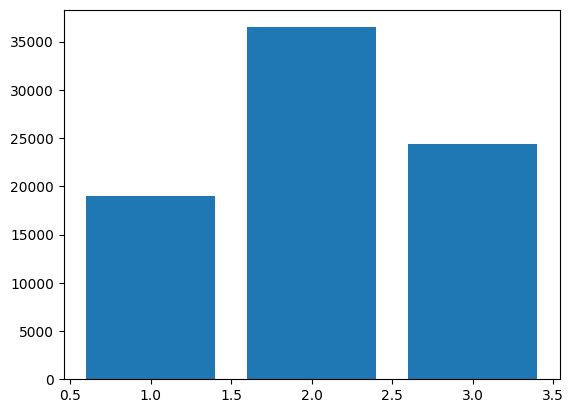

In [249]:
plt.bar(credit_mix_converted.value_counts().index, 
        credit_mix_converted.value_counts().values)
plt.show()

In [250]:
df_converted['credit_mix'] = credit_mix_converted
display(df_converted)

,age,month,annual_income,monthly_inhand_salary,num_bank_accounts,interest_rate,num_credit_card,num_of_loan,type_of_loan,delay_from_due_date,num_of_delayed_payments,changed_credit_limit,num_credit_inquities,credit_mix,outstanding_debt
0,23.0,1,19114.12,1824.843333,3,3,4,4.0,"[auto loan, credit-builder loan, personal loan...",3,7.0,11.27,4.0,NaN,809.98
1,23.0,2,19114.12,NaN,3,3,4,4.0,"[auto loan, credit-builder loan, personal loan...",-1,NaN,11.27,4.0,3.0,809.98
2,-500.0,3,19114.12,NaN,3,3,4,4.0,"[auto loan, credit-builder loan, personal loan...",3,7.0,NaN,4.0,3.0,809.98
3,23.0,4,19114.12,NaN,3,3,4,4.0,"[auto loan, credit-builder loan, personal loan...",5,4.0,6.27,4.0,3.0,809.98
4,23.0,5,19114.12,1824.843333,3,3,4,4.0,"[auto loan, credit-builder loan, personal loan...",6,NaN,11.27,4.0,3.0,809.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,25.0,4,39628.99,3359.415833,4,7,6,2.0,"[auto loan, student loan]",23,7.0,11.50,3.0,NaN,502.38
99996,25.0,5,39628.99,3359.415833,4,7,6,2.0,"[auto loan, student loan]",18,7.0,11.50,3.0,NaN,502.38
99997,25.0,6,39628.99,3359.415833,4,5729,6,2.0,"[auto loan, student loan]",27,6.0,11.50,3.0,3.0,502.38
99998,25.0,7,39628.99,3359.415833,4,7,6,2.0,"[auto loan, student loan]",20,NaN,11.50,3.0,3.0,502.38


In [251]:
print(df.Outstanding_Debt.isna().sum())
print(df.Outstanding_Debt.value_counts())
print(df.Outstanding_Debt.dtype)

0
Outstanding_Debt
1360.45     24
460.46      23
1151.7      23
1109.03     23
482.88      16
            ..
494.51_      1
807.65_      1
290.39_      1
2866.5_      1
1283.37_     1
Name: count, Length: 13178, dtype: int64
object


In [252]:
outstanding_debt_converted = np.array([convert_income_values(value) for value in df.Outstanding_Debt])
print(outstanding_debt_converted)

[809.98 809.98 809.98 ... 502.38 502.38 502.38]


In [253]:
df_converted['outstanding_debt'] = outstanding_debt_converted
display(df_converted)

,age,month,annual_income,monthly_inhand_salary,num_bank_accounts,interest_rate,num_credit_card,num_of_loan,type_of_loan,delay_from_due_date,num_of_delayed_payments,changed_credit_limit,num_credit_inquities,credit_mix,outstanding_debt
0,23.0,1,19114.12,1824.843333,3,3,4,4.0,"[auto loan, credit-builder loan, personal loan...",3,7.0,11.27,4.0,NaN,809.98
1,23.0,2,19114.12,NaN,3,3,4,4.0,"[auto loan, credit-builder loan, personal loan...",-1,NaN,11.27,4.0,3.0,809.98
2,-500.0,3,19114.12,NaN,3,3,4,4.0,"[auto loan, credit-builder loan, personal loan...",3,7.0,NaN,4.0,3.0,809.98
3,23.0,4,19114.12,NaN,3,3,4,4.0,"[auto loan, credit-builder loan, personal loan...",5,4.0,6.27,4.0,3.0,809.98
4,23.0,5,19114.12,1824.843333,3,3,4,4.0,"[auto loan, credit-builder loan, personal loan...",6,NaN,11.27,4.0,3.0,809.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,25.0,4,39628.99,3359.415833,4,7,6,2.0,"[auto loan, student loan]",23,7.0,11.50,3.0,NaN,502.38
99996,25.0,5,39628.99,3359.415833,4,7,6,2.0,"[auto loan, student loan]",18,7.0,11.50,3.0,NaN,502.38
99997,25.0,6,39628.99,3359.415833,4,5729,6,2.0,"[auto loan, student loan]",27,6.0,11.50,3.0,3.0,502.38
99998,25.0,7,39628.99,3359.415833,4,7,6,2.0,"[auto loan, student loan]",20,NaN,11.50,3.0,3.0,502.38


In [257]:
print(df.Credit_Utilization_Ratio.dtype)
print(df.Credit_Utilization_Ratio.isna().sum())
print(df.Credit_Utilization_Ratio.value_counts())

float64
0
Credit_Utilization_Ratio
39.300980    1
38.850680    1
37.753013    1
27.495263    1
36.979007    1
            ..
24.797347    1
31.377862    1
28.609352    1
31.944960    1
26.822620    1
Name: count, Length: 100000, dtype: int64


In [258]:
df_converted['credit_utilization_ratio'] = df.Credit_Utilization_Ratio
display(df_converted)

,age,month,annual_income,monthly_inhand_salary,num_bank_accounts,interest_rate,num_credit_card,num_of_loan,type_of_loan,delay_from_due_date,num_of_delayed_payments,changed_credit_limit,num_credit_inquities,credit_mix,outstanding_debt,credit_utilization_ratio
0,23.0,1,19114.12,1824.843333,3,3,4,4.0,"[auto loan, credit-builder loan, personal loan...",3,7.0,11.27,4.0,NaN,809.98,26.822620
1,23.0,2,19114.12,NaN,3,3,4,4.0,"[auto loan, credit-builder loan, personal loan...",-1,NaN,11.27,4.0,3.0,809.98,31.944960
2,-500.0,3,19114.12,NaN,3,3,4,4.0,"[auto loan, credit-builder loan, personal loan...",3,7.0,NaN,4.0,3.0,809.98,28.609352
3,23.0,4,19114.12,NaN,3,3,4,4.0,"[auto loan, credit-builder loan, personal loan...",5,4.0,6.27,4.0,3.0,809.98,31.377862
4,23.0,5,19114.12,1824.843333,3,3,4,4.0,"[auto loan, credit-builder loan, personal loan...",6,NaN,11.27,4.0,3.0,809.98,24.797347
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,25.0,4,39628.99,3359.415833,4,7,6,2.0,"[auto loan, student loan]",23,7.0,11.50,3.0,NaN,502.38,34.663572
99996,25.0,5,39628.99,3359.415833,4,7,6,2.0,"[auto loan, student loan]",18,7.0,11.50,3.0,NaN,502.38,40.565631
99997,25.0,6,39628.99,3359.415833,4,5729,6,2.0,"[auto loan, student loan]",27,6.0,11.50,3.0,3.0,502.38,41.255522
99998,25.0,7,39628.99,3359.415833,4,7,6,2.0,"[auto loan, student loan]",20,NaN,11.50,3.0,3.0,502.38,33.638208


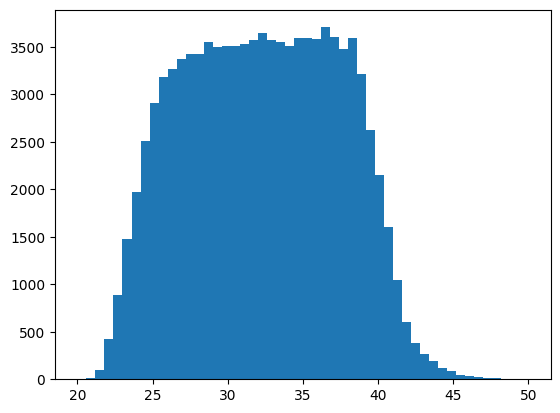

In [259]:
plt.hist(df.Credit_Utilization_Ratio, bins=50)
plt.show()

In [262]:
print(df.Credit_History_Age)

0         22 Years and 1 Months
1                           NaN
2         22 Years and 3 Months
3         22 Years and 4 Months
4         22 Years and 5 Months
                  ...          
99995     31 Years and 6 Months
99996     31 Years and 7 Months
99997     31 Years and 8 Months
99998     31 Years and 9 Months
99999    31 Years and 10 Months
Name: Credit_History_Age, Length: 100000, dtype: object


In [269]:
credit_history_age = df.Credit_History_Age.apply(lambda x: int(x.split(' ')[0]) * 12 + int(x.split(' ')[3]) if pandas.notna(x) else np.nan)

print(credit_history_age)

0        265.0
1          NaN
2        267.0
3        268.0
4        269.0
         ...  
99995    378.0
99996    379.0
99997    380.0
99998    381.0
99999    382.0
Name: Credit_History_Age, Length: 100000, dtype: float64


In [270]:
df_converted['credit_history_age'] = credit_history_age
display(df_converted)

,age,month,annual_income,monthly_inhand_salary,num_bank_accounts,interest_rate,num_credit_card,num_of_loan,type_of_loan,delay_from_due_date,num_of_delayed_payments,changed_credit_limit,num_credit_inquities,credit_mix,outstanding_debt,credit_utilization_ratio,credit_history_age
0,23.0,1,19114.12,1824.843333,3,3,4,4.0,"[auto loan, credit-builder loan, personal loan...",3,7.0,11.27,4.0,NaN,809.98,26.822620,265.0
1,23.0,2,19114.12,NaN,3,3,4,4.0,"[auto loan, credit-builder loan, personal loan...",-1,NaN,11.27,4.0,3.0,809.98,31.944960,NaN
2,-500.0,3,19114.12,NaN,3,3,4,4.0,"[auto loan, credit-builder loan, personal loan...",3,7.0,NaN,4.0,3.0,809.98,28.609352,267.0
3,23.0,4,19114.12,NaN,3,3,4,4.0,"[auto loan, credit-builder loan, personal loan...",5,4.0,6.27,4.0,3.0,809.98,31.377862,268.0
4,23.0,5,19114.12,1824.843333,3,3,4,4.0,"[auto loan, credit-builder loan, personal loan...",6,NaN,11.27,4.0,3.0,809.98,24.797347,269.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,25.0,4,39628.99,3359.415833,4,7,6,2.0,"[auto loan, student loan]",23,7.0,11.50,3.0,NaN,502.38,34.663572,378.0
99996,25.0,5,39628.99,3359.415833,4,7,6,2.0,"[auto loan, student loan]",18,7.0,11.50,3.0,NaN,502.38,40.565631,379.0
99997,25.0,6,39628.99,3359.415833,4,5729,6,2.0,"[auto loan, student loan]",27,6.0,11.50,3.0,3.0,502.38,41.255522,380.0
99998,25.0,7,39628.99,3359.415833,4,7,6,2.0,"[auto loan, student loan]",20,NaN,11.50,3.0,3.0,502.38,33.638208,381.0


In [274]:
print(df.Payment_of_Min_Amount)
print(df.Payment_of_Min_Amount.dtype)
print(df.Payment_of_Min_Amount.value_counts())

0        No
1        No
2        No
3        No
4        No
         ..
99995    No
99996    No
99997    No
99998    No
99999    No
Name: Payment_of_Min_Amount, Length: 100000, dtype: object
object
Payment_of_Min_Amount
Yes    52326
No     35667
NM     12007
Name: count, dtype: int64


In [276]:
map_payment_of_min_amount = {'Yes' : 1, 'No': 0, 'NM' : np.nan}
payment_of_min_amount_converted = df.Payment_of_Min_Amount.map(map_payment_of_min_amount)
print(payment_of_min_amount_converted.value_counts())

Payment_of_Min_Amount
1.0    52326
0.0    35667
Name: count, dtype: int64


In [277]:
df_converted['payment_of_min_amount'] = payment_of_min_amount_converted
display(df_converted)

,age,month,annual_income,monthly_inhand_salary,num_bank_accounts,interest_rate,num_credit_card,num_of_loan,type_of_loan,delay_from_due_date,num_of_delayed_payments,changed_credit_limit,num_credit_inquities,credit_mix,outstanding_debt,credit_utilization_ratio,credit_history_age,payment_of_min_amount
0,23.0,1,19114.12,1824.843333,3,3,4,4.0,"[auto loan, credit-builder loan, personal loan...",3,7.0,11.27,4.0,NaN,809.98,26.822620,265.0,0.0
1,23.0,2,19114.12,NaN,3,3,4,4.0,"[auto loan, credit-builder loan, personal loan...",-1,NaN,11.27,4.0,3.0,809.98,31.944960,NaN,0.0
2,-500.0,3,19114.12,NaN,3,3,4,4.0,"[auto loan, credit-builder loan, personal loan...",3,7.0,NaN,4.0,3.0,809.98,28.609352,267.0,0.0
3,23.0,4,19114.12,NaN,3,3,4,4.0,"[auto loan, credit-builder loan, personal loan...",5,4.0,6.27,4.0,3.0,809.98,31.377862,268.0,0.0
4,23.0,5,19114.12,1824.843333,3,3,4,4.0,"[auto loan, credit-builder loan, personal loan...",6,NaN,11.27,4.0,3.0,809.98,24.797347,269.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,25.0,4,39628.99,3359.415833,4,7,6,2.0,"[auto loan, student loan]",23,7.0,11.50,3.0,NaN,502.38,34.663572,378.0,0.0
99996,25.0,5,39628.99,3359.415833,4,7,6,2.0,"[auto loan, student loan]",18,7.0,11.50,3.0,NaN,502.38,40.565631,379.0,0.0
99997,25.0,6,39628.99,3359.415833,4,5729,6,2.0,"[auto loan, student loan]",27,6.0,11.50,3.0,3.0,502.38,41.255522,380.0,0.0
99998,25.0,7,39628.99,3359.415833,4,7,6,2.0,"[auto loan, student loan]",20,NaN,11.50,3.0,3.0,502.38,33.638208,381.0,0.0


In [282]:
print(df.Total_EMI_per_month)
print(df.Total_EMI_per_month.dtype)
print(df.Total_EMI_per_month.isna().sum())
print(df.Total_EMI_per_month.unique())

0        49.574949
1        49.574949
2        49.574949
3        49.574949
4        49.574949
           ...    
99995    35.104023
99996    35.104023
99997    35.104023
99998    35.104023
99999    35.104023
Name: Total_EMI_per_month, Length: 100000, dtype: float64
float64
0
[4.95749492e+01 1.88162146e+01 2.46992319e+02 ... 1.21120000e+04
 3.51040226e+01 5.86380000e+04]


In [283]:
df_converted['total_emi_per_month'] = df.Total_EMI_per_month

In [286]:
print(df.Amount_invested_monthly)
print(df.Amount_invested_monthly.dtype)
print(df.Amount_invested_monthly.isna().sum())

0         80.41529543900253
1        118.28022162236736
2           81.699521264648
3         199.4580743910713
4        41.420153086217326
                ...        
99995     60.97133255718485
99996     54.18595028760385
99997     24.02847744864441
99998    251.67258219721603
99999     167.1638651610451
Name: Amount_invested_monthly, Length: 100000, dtype: object
object
4479


In [288]:
amount_invested_monthly = np.array([convert_income_values(value) for value in df.Amount_invested_monthly])
print(amount_invested_monthly)

[ 80.41529544 118.28022162  81.69952126 ...  24.02847745 251.6725822
 167.16386516]


In [289]:
df_converted['amount_invested_monthly'] = amount_invested_monthly

In [292]:
print(df.Payment_Behaviour)
print(df.Payment_Behaviour.unique())
print(df.Payment_Behaviour.value_counts())

0         High_spent_Small_value_payments
1          Low_spent_Large_value_payments
2         Low_spent_Medium_value_payments
3          Low_spent_Small_value_payments
4        High_spent_Medium_value_payments
                       ...               
99995     High_spent_Large_value_payments
99996    High_spent_Medium_value_payments
99997     High_spent_Large_value_payments
99998      Low_spent_Large_value_payments
99999                              !@9#%8
Name: Payment_Behaviour, Length: 100000, dtype: object
['High_spent_Small_value_payments' 'Low_spent_Large_value_payments'
 'Low_spent_Medium_value_payments' 'Low_spent_Small_value_payments'
 'High_spent_Medium_value_payments' '!@9#%8'
 'High_spent_Large_value_payments']
Payment_Behaviour
Low_spent_Small_value_payments      25513
High_spent_Medium_value_payments    17540
Low_spent_Medium_value_payments     13861
High_spent_Large_value_payments     13721
High_spent_Small_value_payments     11340
Low_spent_Large_value_payments      10

In [293]:
map_payment_behaviour = {'Low_spent_Small_value_payments' : 0, 'High_spent_Medium_value_payments' : 1, 'Low_spent_Medium_value_payments' : 2, 'High_spent_Large_value_payments' : 3, 'High_spent_Small_value_payments' : 4, 'Low_spent_Large_value_payments' : 5, '!@9#%8' : np.nan}

payment_behaviour_converted = df.Payment_Behaviour.map(map_payment_behaviour)
print(payment_behaviour_converted)
print(payment_behaviour_converted.value_counts())

0        4.0
1        5.0
2        2.0
3        0.0
4        1.0
        ... 
99995    3.0
99996    1.0
99997    3.0
99998    5.0
99999    NaN
Name: Payment_Behaviour, Length: 100000, dtype: float64
Payment_Behaviour
0.0    25513
1.0    17540
2.0    13861
3.0    13721
4.0    11340
5.0    10425
Name: count, dtype: int64


In [294]:
df_converted['payment_behaviour'] = payment_behaviour_converted

In [298]:
print(df.Monthly_Balance)
print(df.Monthly_Balance.dtype)
print(df.Monthly_Balance.isna().sum())
print(df.Monthly_Balance.value_counts())

0        312.49408867943663
1        284.62916249607184
2         331.2098628537912
3        223.45130972736786
4        341.48923103222177
                ...        
99995            479.866228
99996             496.65161
99997            516.809083
99998            319.164979
99999            393.673696
Name: Monthly_Balance, Length: 100000, dtype: object
object
1200
Monthly_Balance
__-333333333333333333333333333__    9
328.655224                          1
432.559318                          1
470.69062692529184                  1
393.673696                          1
                                   ..
300.008498                          1
396.997157                          1
368.154976                          1
412.669312                          1
895.494583180492                    1
Name: count, Length: 98792, dtype: int64


In [ ]:
monthly_balance_converted = np.array([convert_income_values(value) for value in df.Monthly_Balance])
print(monthly_balance_converted)

[312.49408868 284.6291625  331.20986285 ... 516.80908327 319.16497853
 393.67369556]


In [302]:
df_converted['monthly_balance'] = monthly_balance_converted
print(df_converted['monthly_balance'].value_counts())
display(df_converted)

monthly_balance
-3.333333e+26    9
 3.286552e+02    1
 4.325593e+02    1
 4.706906e+02    1
 3.936737e+02    1
                ..
 3.000085e+02    1
 3.969972e+02    1
 3.681550e+02    1
 4.126693e+02    1
 8.954946e+02    1
Name: count, Length: 98792, dtype: int64


,age,month,annual_income,monthly_inhand_salary,num_bank_accounts,interest_rate,num_credit_card,num_of_loan,type_of_loan,delay_from_due_date,...,num_credit_inquities,credit_mix,outstanding_debt,credit_utilization_ratio,credit_history_age,payment_of_min_amount,total_emi_per_month,amount_invested_monthly,payment_behaviour,monthly_balance
0,23.0,1,19114.12,1824.843333,3,3,4,4.0,"[auto loan, credit-builder loan, personal loan...",3,...,4.0,NaN,809.98,26.822620,265.0,0.0,49.574949,80.415295,4.0,312.494089
1,23.0,2,19114.12,NaN,3,3,4,4.0,"[auto loan, credit-builder loan, personal loan...",-1,...,4.0,3.0,809.98,31.944960,NaN,0.0,49.574949,118.280222,5.0,284.629162
2,-500.0,3,19114.12,NaN,3,3,4,4.0,"[auto loan, credit-builder loan, personal loan...",3,...,4.0,3.0,809.98,28.609352,267.0,0.0,49.574949,81.699521,2.0,331.209863
3,23.0,4,19114.12,NaN,3,3,4,4.0,"[auto loan, credit-builder loan, personal loan...",5,...,4.0,3.0,809.98,31.377862,268.0,0.0,49.574949,199.458074,0.0,223.451310
4,23.0,5,19114.12,1824.843333,3,3,4,4.0,"[auto loan, credit-builder loan, personal loan...",6,...,4.0,3.0,809.98,24.797347,269.0,0.0,49.574949,41.420153,1.0,341.489231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,25.0,4,39628.99,3359.415833,4,7,6,2.0,"[auto loan, student loan]",23,...,3.0,NaN,502.38,34.663572,378.0,0.0,35.104023,60.971333,3.0,479.866228
99996,25.0,5,39628.99,3359.415833,4,7,6,2.0,"[auto loan, student loan]",18,...,3.0,NaN,502.38,40.565631,379.0,0.0,35.104023,54.185950,1.0,496.651610
99997,25.0,6,39628.99,3359.415833,4,5729,6,2.0,"[auto loan, student loan]",27,...,3.0,3.0,502.38,41.255522,380.0,0.0,35.104023,24.028477,3.0,516.809083
99998,25.0,7,39628.99,3359.415833,4,7,6,2.0,"[auto loan, student loan]",20,...,3.0,3.0,502.38,33.638208,381.0,0.0,35.104023,251.672582,5.0,319.164979
